# EDA (Exploratory Data Analysis)

### 1. Load the dataset


### 2. Clean the data (missing values, duplicates, types)


### 3. Treatment of outliers


### 4. univariate, bivariate and multivariate analysis


### 5.  Insights

### Outlier
A data point that is significantly different from other observations in a dataset.

### How Outliers will come?
1. Measurement errors

2. Data entry mistakes

### Why Outliers are important? 
1. They can be errors

2. They effect data analysis

### How to identify Outliers?
1. Statistical methods
    - Interquartile Range (IQR)
    - Z-Score

2. Visualization techniques
    - Box Plot
    - Scatter Plot
    - Histograms

### Univariate Analysis
A method that analyzes a single variable to describe its characteristics and finding patterns and summarize the data.
- It involves only 1 variable.

### Bivariate Analysis
It will give the relationship between 2 variables. It helps to discover or to find if there is an any correlation between the 2 variables and any association or any connection between the 2 variables.
- It involves 2 variables (x & y).

### Multivariate Analysis
To understand how multiple factors interact and influence each other.
- It involves more than 2 variables.
- Example: 
    - How our age, income and education level togather influence the purchasing behaviour

## ETL (Extract Transform Load)

### EDA

1. Load & Overview

2. Cleaning (missing, duplicates, dtypes)

3. Uni, Bi, & Multi analysis

4. Treatment of outliers - IQR

5. Feature Engineering

6. Key Insights

### Feature Engineering 
"It is the process of turning raw data into useful features" that helps to improve the performance of machine leaning models.

# 1. Load libraries and dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load Titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# 2. Basic Information and overview
print("Shape of dataset: ",df.shape)
print("\n Data Info: ", df.info())

#Summary Statistics
df.describe(include='all')

Shape of dataset:  (127, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     127 non-null    int64   
 1   pclass       127 non-null    int64   
 2   sex          127 non-null    object  
 3   age          100 non-null    float64 
 4   sibsp        127 non-null    int64   
 5   parch        127 non-null    int64   
 6   fare         127 non-null    float64 
 7   embarked     126 non-null    object  
 8   class        127 non-null    category
 9   who          127 non-null    object  
 10  adult_male   127 non-null    object  
 11  deck         25 non-null     category
 12  embark_town  125 non-null    object  
 13  alive        126 non-null    object  
 14  alone        126 non-null    object  
dtypes: category(2), float64(2), int64(4), object(7)
memory usage: 13.8+ KB

 Data Info:  None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,127.000000,127.000000,127,100.000000,127.000000,127.000000,127.00000,126,127,127,127,25,125,126,126
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,3,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,80,NaN,NaN,NaN,NaN,88,80,73,72,8,88,80,68
mean,0.362205,2.433071,NaN,27.673300,0.685039,0.385827,29.54288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.482541,0.802680,NaN,15.117314,1.131797,0.891292,42.57015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.830000,0.000000,0.000000,7.22500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,19.000000,0.000000,0.000000,8.03960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.45420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,34.250000,1.000000,0.000000,31.27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 3. Missing Values Analysis

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
deck,102,80.314961
age,27,21.259843
embark_town,2,1.574803
embarked,1,0.787402
alive,1,0.787402
alone,1,0.787402
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000


In [15]:
# 4. Handling Missing value

# Fill the numeric missing values with the mean
df['age'] = df['age'].fillna(df['age'].mean())

# Fill categorical missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'], inplace=True)


In [14]:
print("Missing values after cleaning:\n", df.isnull().sum().sum())

Missing values after cleaning:
 4


### Insight :  
### 1. We filled important columns and removed highly missing values.
### 2. This Keeps maximum information while making the dataset clean.

In [17]:
# 5. Duplicates & data type check

print("Duplicate rows: ", df.duplicated().sum())

# Convert some columns to category type
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

Duplicate rows:  7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     127 non-null    int64   
 1   pclass       127 non-null    int64   
 2   sex          127 non-null    category
 3   age          127 non-null    float64 
 4   sibsp        127 non-null    int64   
 5   parch        127 non-null    int64   
 6   fare         127 non-null    float64 
 7   embarked     127 non-null    category
 8   class        127 non-null    category
 9   who          127 non-null    object  
 10  adult_male   127 non-null    object  
 11  embark_town  125 non-null    object  
 12  alive        126 non-null    object  
 13  alone        126 non-null    object  
dtypes: category(3), float64(2), int64(4), object(5)
memory usage: 11.8+ KB


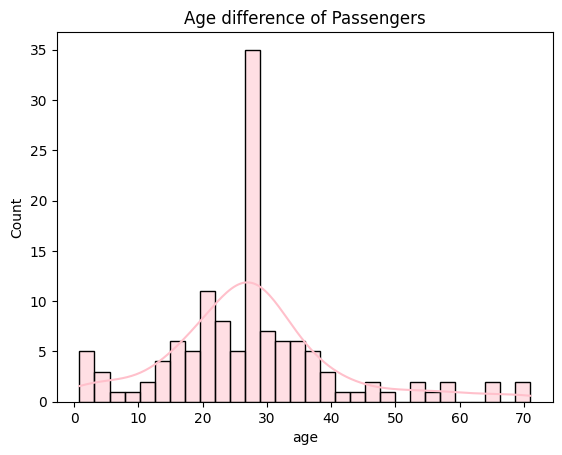

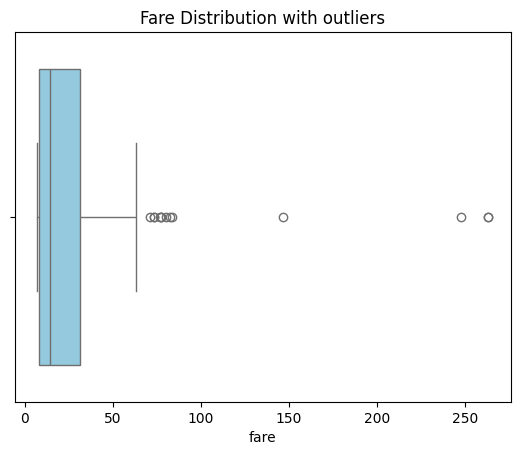

In [27]:
# 6. Univariate Analysis for numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()

# Hisogram : Age
sns.histplot(df['age'], bins= 30, kde=True, color="pink")
plt.title("Age difference of Passengers")
plt.show()

# Boxplot : Fare
sns.boxplot(x=df['fare'], color="skyblue")
plt.title("Fare Distribution with outliers")
plt.show()

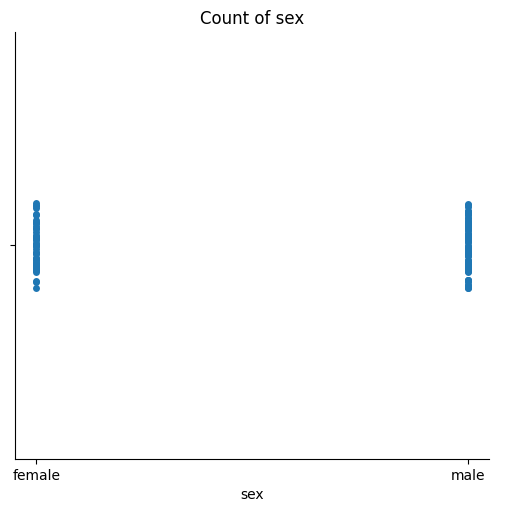

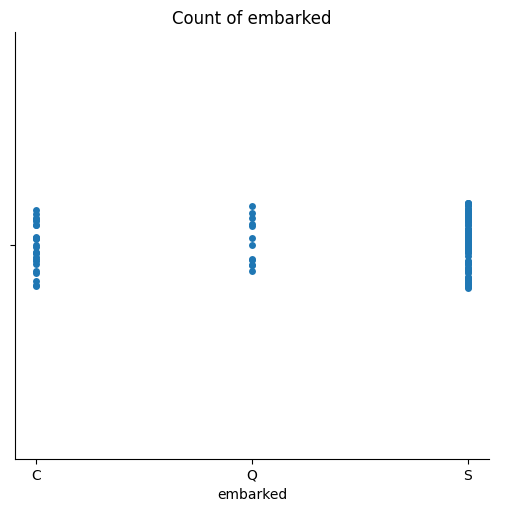

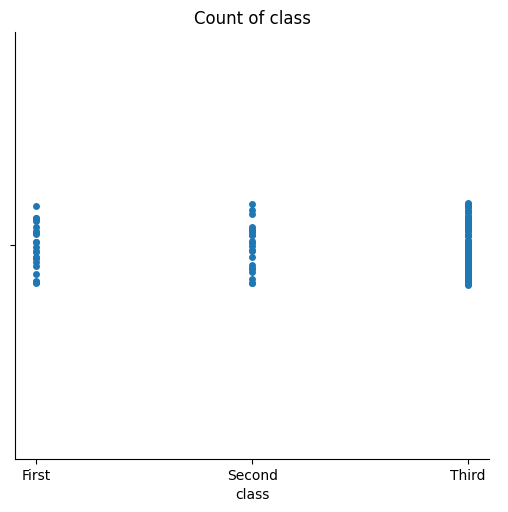

In [28]:
# Univariate analysis - categorical features

cat_clos = df.select_dtypes('category').columns

for col in cat_clos:
    sns.catplot(x=col, data = df)
    plt.title(f"Count of {col}")
    plt.show()

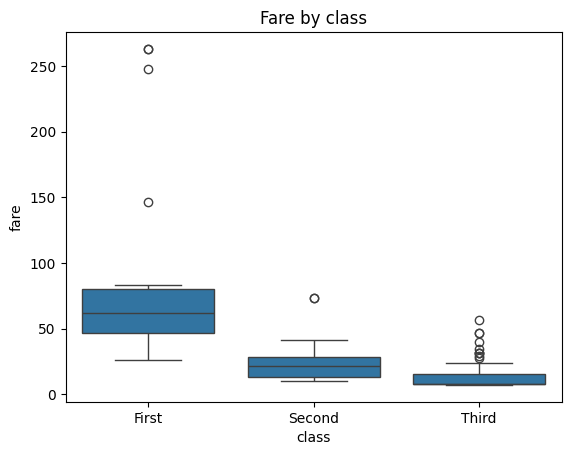

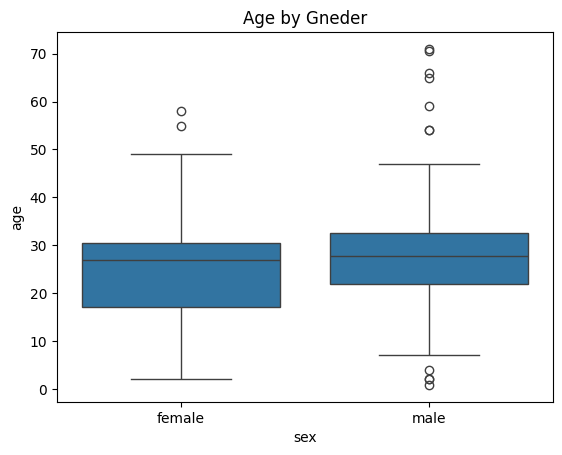

In [31]:
# Bivariate Analysis - Numerical vs Categorical

sns.boxplot(x='class', y='fare', data = df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex', y='age', data = df)
plt.title("Age by Gneder")
plt.show()

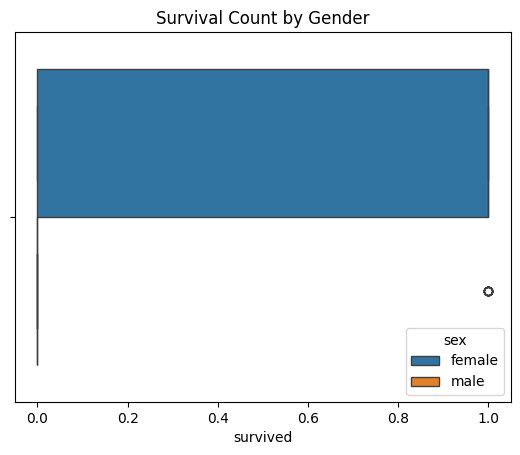

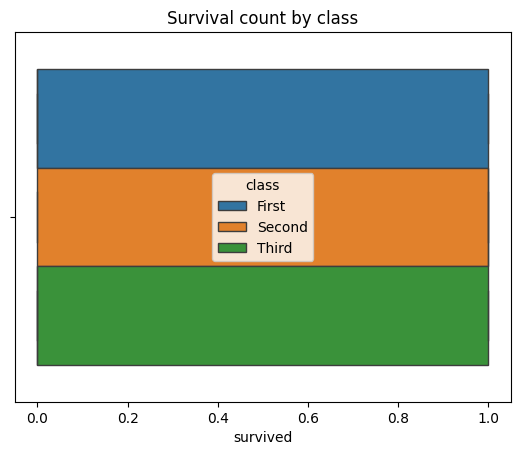

In [35]:
# Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x='survived', hue='sex', data = df)
plt.title("Survival Count by Gender")
plt.show()


sns.boxplot(x='survived', hue='class', data = df)
plt.title("Survival count by class")
plt.show()

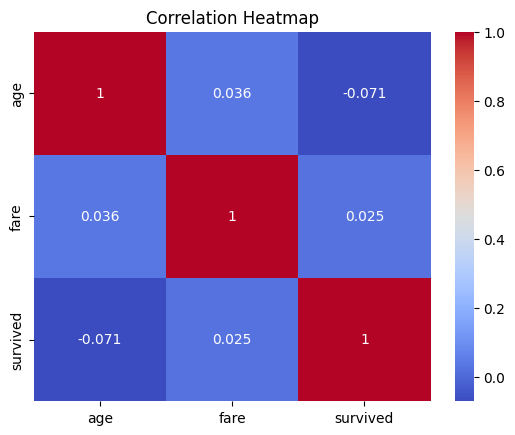

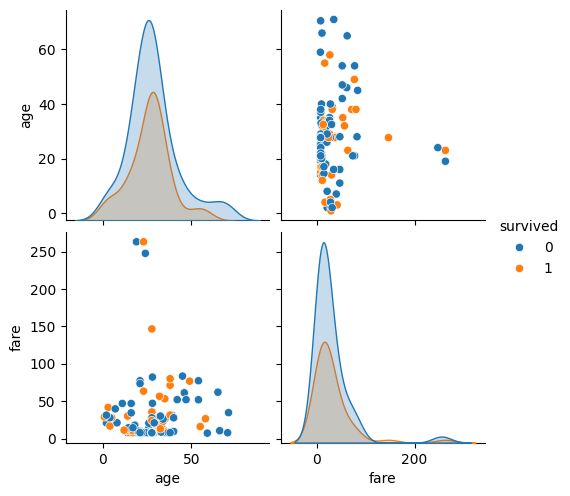

In [37]:
# Correlation and multivariate analysis

corr = df[['age','fare','survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()

### Insights
### 1. Fare has a positive correlation with survival
### 2. Age has a slight negative correlation with survival

Number of outliers in fare: 


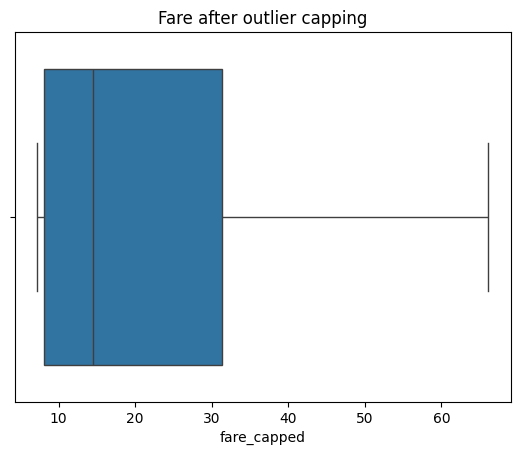

In [41]:
# Outlier detection using IQR

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers in fare: "), len(outliers)

df['fare_capped'] = df['fare'].clip(lower, upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

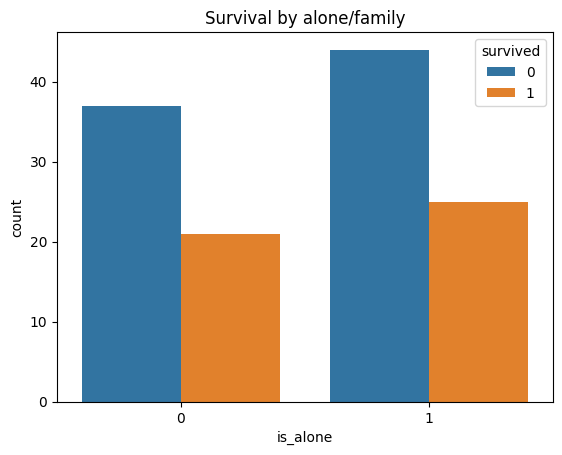

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [43]:
# Feature Engineering

# Create new features
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x = 'is_alone', hue = 'survived', data=df)
plt.title("Survival by alone/family")
plt.show()

df[['family_size', 'is_alone', 'survived']].head()

In [44]:
# Export the Cleaned data

df.to_csv("Titanic_cleaned.csv", index=False)
print("\n Cleaned Titanic Data saved as Titanic_cleaned.csv")


 Cleaned Titanic Data saved as Titanic_cleaned.csv
